## Generate the figure
- Just to make things organized - use this notebook to generate the figures

In [1]:
import pandas as pd 

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import pingouin as pg

In [2]:
df = pd.read_csv('../../scr_amg_hipp_all.csv')

In [3]:
df.head(8)

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr,index,subject,trialNo,condition,coupling,amg,Sub,group,Eprime,amg_vmpfc,amg_HippAnt,amg_ctrl
0,sub-189,CSplusUS1,1,0.2852,0.803038,0.500000,0.2852,1794,sub-189,1,CSplusUS1,0.309524,0.981121,sub-189,HC,A,0.904762,0.571429,0.523810
1,sub-189,CSminus1,2,0.1033,0.798837,-0.500000,0.1033,1795,sub-189,2,CSminus1,-0.571429,-0.027048,sub-189,HC,A,0.404762,-0.119048,0.404762
2,sub-189,CSplus1,3,0.0783,0.800927,-0.501291,0.0783,1796,sub-189,3,CSplus1,-0.476190,-0.045910,sub-189,HC,A,0.333333,-0.642857,0.119048
3,sub-189,CSplusUS1,4,0.1772,0.803028,0.500006,0.1772,1797,sub-189,4,CSplusUS1,0.166667,-0.674150,sub-189,HC,A,0.690476,0.357143,0.285714
4,sub-189,CSminus1,5,0.0000,0.796747,-0.498709,0.0000,1798,sub-189,5,CSminus1,0.214286,-0.065602,sub-189,HC,A,0.595238,0.309524,0.214286
5,sub-189,CSplus1,6,0.0000,0.800917,-0.501285,0.0000,1799,sub-189,6,CSplus1,-0.690476,-0.398827,sub-189,HC,A,0.428571,-0.238095,0.333333
6,sub-189,CSplus1,7,0.0000,0.798817,-0.499988,0.0000,1800,sub-189,7,CSplus1,0.285714,-0.104992,sub-189,HC,A,-0.023810,-0.071429,-0.071429
7,sub-189,CSminus1,8,0.0000,0.794667,-0.497424,0.0000,1801,sub-189,8,CSminus1,-0.404762,-0.423804,sub-189,HC,A,-0.047619,-0.190476,-0.428571


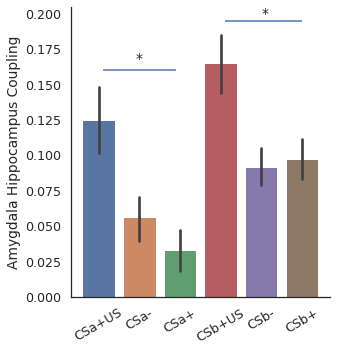

In [4]:
# plot bar graphs (conditions)
# amygdala
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='coupling',x='condition', data=df, kind='bar', ci=68)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CSa+US", "CSa-", "CSa+", "CSb+US", "CSb-", "CSb+"], rotation=30)
plt.text(0.9, 0.165, "*")
plt.hlines(0.16, 0.1,1.9)
plt.text(4, 0.197, "*")
plt.hlines(0.195, 3.1,5)
g.set_ylabels("Amygdala Hippocampus Coupling")
g.savefig('coupling_different_Conditions.png', dpi=300, bbox_inches='tight')

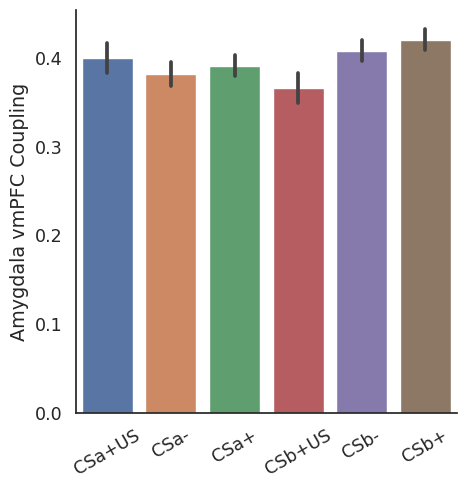

In [5]:
# vmpfc
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='amg_vmpfc',x='condition', data=df, kind='bar', ci=68)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CSa+US", "CSa-", "CSa+", "CSb+US", "CSb-", "CSb+"], rotation=30)

g.set_ylabels("Amygdala vmPFC Coupling")
g.savefig('coupling_different_Conditions_vmPFC.png', dpi=300, bbox_inches='tight')

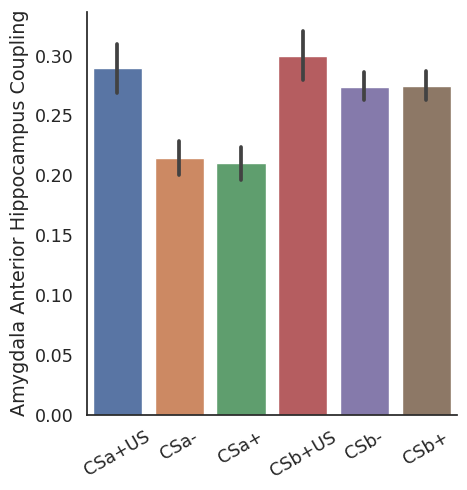

In [6]:
# anterior hippocampus
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='amg_HippAnt',x='condition', data=df, kind='bar', ci=68)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CSa+US", "CSa-", "CSa+", "CSb+US", "CSb-", "CSb+"], rotation=30)
g.set_ylabels("Amygdala Anterior Hippocampus Coupling")
g.savefig('coupling_different_Conditions_AntHipp.png', dpi=300, bbox_inches='tight')

,n,r,CI95%,p-val,BF10,power
pearson,69,0.440904,"[0.23, 0.61]",0.00015,171.21,0.97193


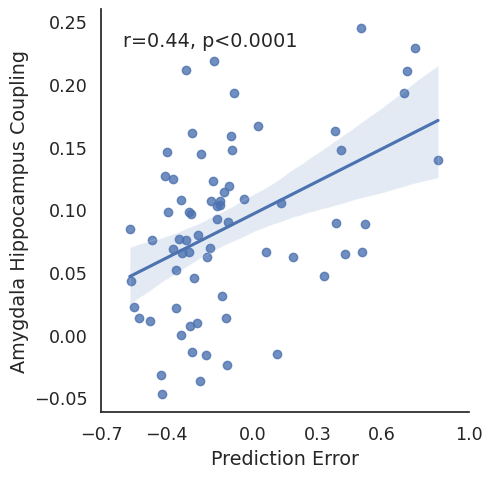

In [10]:
# Correlation with prediction erro 
# This is only for visualization purposes
# plot results
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("white")
a = sns.lmplot(x ='pe', y='coupling', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala Hippocampus Coupling")
plt.text(-0.6,0.23, "r=0.44, p<0.0001")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
a.savefig('pe_coupling.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['coupling'])

,n,r,CI95%,p-val,BF10,power
pearson,69,-0.220047,"[-0.43, 0.02]",0.069248,0.757,0.447808


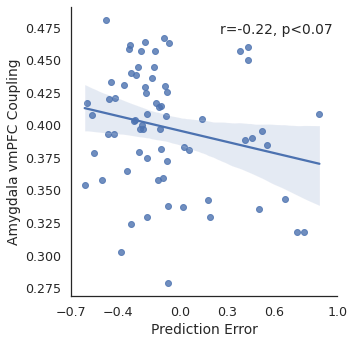

In [13]:
# vmpfc
# plot results
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("white")
a = sns.lmplot(x ='pe', y='amg_vmpfc', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala vmPFC Coupling")
plt.text(0.25,0.47, "r=-0.22, p<0.07")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
a.savefig('pe_couplingVMPFC.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['amg_vmpfc'])